В цьому домашньому завданні ми побудуємо рішення задачі логістичної регресії і створимо ваш перший submission на змагання на Kaggle. Усі кроки були розглянуті в лекції та містяться в ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb`, але тепер ми їх адаптуємо до іншої задачі - все як в реальному житті, коли ви знайшли код у відкритих джерелах і адаптуєте на проєкті 😉

**Погнали! 🚀🚀🚀**

-----------



0. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle - шукайте посилання в уроці [Запрошення до участі у Kaggle-змаганні.](https://data-loves.kwiga.com/courses/machine-learning-dlia-liudei/domashnie-zavdannia-zmagannia-z-kaggle) Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

1. Зчитайте дані `train.csv` в pandas dataframe та розбийте їх на train і validation піднабори.

  * Є такий параметр в методі train_test_split як stratified. Можливо він буде Вам корисним при розбитті даних в цій задачі. Пропоную Вам почитати про нього в документації і спробувати скористатись.

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('/Users/shein/ML_course/Data/train.csv')

In [7]:
y = df.Exited

In [5]:
from sklearn.model_selection import train_test_split

In [8]:
train_df, val_df = train_test_split(df, test_size=0.2, stratify=y, random_state=42)

2. Визначіть назви колонок, які сформують вхідні незалежні дані, в змінній `input_cols` та назву колонки , яка є цільовою, в змінній `target_col`. Використовуючи `input_cols` та `target_col` створіть набори даних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` - де `inputs` - вхідні дані (датафрейм), `targets` - дані цільової колонки відповідного піднабору.

In [9]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'Exited'

In [29]:
train_inputs, train_targets = train_df[input_cols].copy(), train_df[target_col].copy()
val_inputs, val_targets = val_df[input_cols].copy(), val_df[target_col].copy()

3. Визначіть з допомогою `pandas.DataFrame.select_dtypes` назви колонок, які є числовими і категоріальними. Запишіть результати в `numeric_cols` та `categorical_cols` відповідно.

In [12]:
import numpy as np

In [35]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

4. Зробіть підготовку даних в категоріальних і числових колонках для входу в модель виходячи з освоєного на даний момент на курсі. Варіанти пеердобробки, з якими ми вже знайомі:
  - масштабування числових ознак,
  - заповнення пропущених значень, якщо вони є,
  - кодування категоріальних ознак, вилучення ознак, якщо ми вважаємо, що ці дані нерелевантні для моделі аби ми не бачимо способу як їх так закодувати, аби подати на вхід моделі.

  Тут є багато варіантів, як Ви побудуєте передобробку, важливо аби
  1) передобробка мала сенс (немає сенсу заповнювати дані константою, яку ми не зрозуміло звідки взяли)   
  2) має бути виконана принаймні одна дія передобробки
  3) обробка маэ бути виконана коректно і для тренувальних, і для вал. даних
  4) чим вищий у Вас врешті вийде ROС AUC скор, тим більше шансів перемогти у змаганні :)

  Опишіть рішення проведення кожного з кроків передобробки. Для чого ви його робите? По завершенню виведіть по 5 значен з `train_inputs`, `val_inputs` використовуючи `display()`.

In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12000 entries, 7180 to 9360
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               12000 non-null  int64  
 1   CustomerId       12000 non-null  float64
 2   Surname          12000 non-null  object 
 3   CreditScore      12000 non-null  float64
 4   Geography        12000 non-null  object 
 5   Gender           12000 non-null  object 
 6   Age              12000 non-null  float64
 7   Tenure           12000 non-null  float64
 8   Balance          12000 non-null  float64
 9   NumOfProducts    12000 non-null  float64
 10  HasCrCard        12000 non-null  float64
 11  IsActiveMember   12000 non-null  float64
 12  EstimatedSalary  12000 non-null  float64
 13  Exited           12000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.4+ MB


In [76]:
train_inputs.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,gender_code,Geography_France,Geography_Germany,Geography_Spain
7180,0.599045,0.214286,0.1,0.626382,0.000000,1.0,1.0,0.719772,1,1.0,0.0,0.0
10393,0.603819,0.375000,0.2,0.848836,0.000000,1.0,0.0,0.727603,0,1.0,0.0,0.0
80,0.653938,0.303571,0.6,0.554522,0.333333,1.0,0.0,0.872180,1,0.0,1.0,0.0
3365,0.568019,0.714286,0.0,0.000000,0.333333,0.0,1.0,0.257797,1,0.0,0.0,1.0
12236,0.658711,0.053571,0.3,0.000000,0.333333,1.0,1.0,0.742837,1,1.0,0.0,0.0


In [37]:
train_inputs[categorical_cols].nunique()

Geography    3
Gender       2
dtype: int64

In [23]:
from sklearn.preprocessing import OneHotEncoder

In [38]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [44]:
encoder.fit(train_inputs[['Geography']])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [53]:
encoded_cols = list(encoder.get_feature_names_out(['Geography']))
encoded_cols

['Geography_France', 'Geography_Germany', 'Geography_Spain']

In [58]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[['Geography']])
val_inputs[encoded_cols] = encoder.transform(val_inputs[['Geography']])

In [54]:
train_inputs.Gender.describe()

count     12000
unique        2
top        Male
freq       6876
Name: Gender, dtype: object

In [56]:
gender_code = {'Female': 0, 'Male': 1}
train_inputs['gender_code'] = train_inputs.Gender.map(gender_code)
val_inputs['gender_code'] = val_inputs.Gender.map(gender_code)

In [60]:
#train_inputs.drop(['CustomerId', 'Surname', 'Geography', 'Gender'], axis=1, inplace=True)
#val_inputs.drop(['CustomerId', 'Surname', 'Geography', 'Gender'], axis=1, inplace=True)

train_inputs.drop(['Geography', 'Gender'], axis=1, inplace=True)
val_inputs.drop(['Geography', 'Gender'], axis=1, inplace=True)

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
scaler = MinMaxScaler()

In [64]:
scaler.fit(train_inputs[numeric_cols])

MinMaxScaler()

In [65]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])

In [73]:
display(train_inputs.round(2)[:5], val_inputs.round(2)[:5])

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,gender_code,Geography_France,Geography_Germany,Geography_Spain
7180,0.60,0.21,0.1,0.63,0.00,1.0,1.0,0.72,1,1.0,0.0,0.0
10393,0.60,0.38,0.2,0.85,0.00,1.0,0.0,0.73,0,1.0,0.0,0.0
80,0.65,0.30,0.6,0.55,0.33,1.0,0.0,0.87,1,0.0,1.0,0.0
3365,0.57,0.71,0.0,0.00,0.33,0.0,1.0,0.26,1,0.0,0.0,1.0
12236,0.66,0.05,0.3,0.00,0.33,1.0,1.0,0.74,1,1.0,0.0,0.0


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,gender_code,Geography_France,Geography_Germany,Geography_Spain
6490,0.68,0.50,0.1,0.55,1.00,1.0,1.0,0.36,1,0.0,1.0,0.0
3646,0.39,0.41,0.5,0.00,0.33,1.0,1.0,0.19,1,1.0,0.0,0.0
5306,0.72,0.36,0.2,0.00,0.33,0.0,1.0,0.58,0,1.0,0.0,0.0
652,0.58,0.45,0.4,0.74,0.00,0.0,1.0,0.56,0,1.0,0.0,0.0
2627,0.59,0.21,0.4,0.00,0.33,1.0,0.0,0.72,0,0.0,0.0,1.0


5. Збережіть дані, що містяться в змінних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` на диск в форматі `parquet`. В кінці виведіть список файлів в папці, в яку Ви зберегли файли і перевірте, чи файли збереглись. Вивести список файлів можна з `os.listdir(your_dir)` або `!ls your_dir`

In [78]:
import pyarrow.parquet as pq

In [79]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')

In [80]:
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')

In [81]:
!ls

HW_1_2_Credit_EDA.ipynb
HW_2_1_Building_a_linear_regression_on_a_single_variable.ipynb
HW_2_1_Feature_Analysis_for_Constructing_Linear_Regression.ipynb
HW_2_1_functions_and_derivatives.ipynb
HW_2_1_Matrices_and_vectors_(Introduction_to_linear_algebra).ipynb
HW_2_1_statistical_hypothesis_testing.ipynb
HW_2_1_Лінійна_регресія_від_багатьох_змінних.ipynb
HW_2_2_Mathematical Formulation of Logistic Regression.ipynb
HW_2_2_Логістична_регресія_з_scikit_learn.ipynb
ML_course_HW_1.ipynb
train_inputs.parquet
train_targets.parquet
val_inputs.parquet
val_targets.parquet


6. З підготовлених вхіжних даних створіть `X_train`, `X_val` набори, які містять лише колонки, які підуть на вхід моделі. Навчіть модель бінарної класифікації з допомогою `LogisticRegression` в `scikit-learn`.

In [82]:
X_train = train_inputs
X_val = val_inputs

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
model = LogisticRegression(solver='liblinear')

In [85]:
model.fit(X_train, train_targets)

LogisticRegression(solver='liblinear')

In [86]:
from sklearn.metrics import confusion_matrix

In [87]:
train_preds = model.predict(X_train)

In [95]:
train_preds

array([0., 0., 0., ..., 0., 0., 0.])

In [88]:
confusion_matrix(train_targets, train_preds)

array([[9177,  381],
       [1128, 1314]])

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

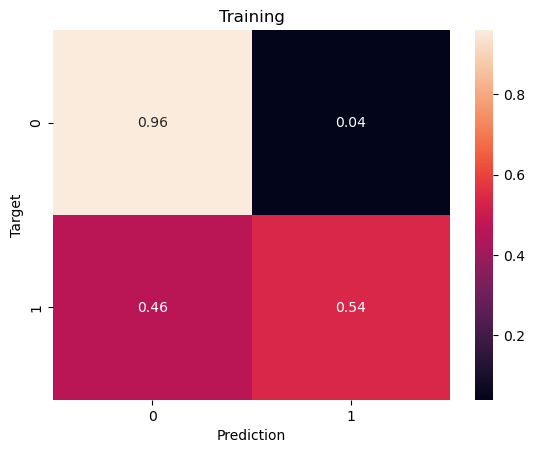

In [94]:
    cf = confusion_matrix(train_targets, train_preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('Training');

7. Виведіть Confusion matrix, ROC Curve, метрику AUROC та метрику F1 Score для порога класифікації 0.5 для побудованої моделі на тренувальних та валідаційних даних. Що можете сказати про якіст моделі? Вона хороша, погана, задовільна?

8. Створіть передбачення моделі, яка передбачає завжди мажоритарний клас (той, якого більше в тренувальних даних). Порахуйте Accuracy на тренувальних та валідаційних даних для цієї моделі і тої, що ми натренували в п.6. Зробіть заключення про якість нашої моделі: якість хороша, погана, задовільна?

9. Збережіть модель і інші обʼєкти, які ви хотіли б зберегти, з використанням бібліотеки joblib в файл `log_reg.joblib`. Потім завантажте модель з файлу в змінну `model_2` (цим ми тренуємось завантажувати модель з файлу на майбутнє).

10. Ознайомтесь з роботою наведеної функції `predict_raw_df`. Ця функція робить підготовку даних (масштабування числових колонок і кодування категоріальних) і виводить ймовірності належності до класу 1 для кожного рядка в наданому наборі.

Доповніть або внесіть зміни у функцію з врахуванням вашого препроцесингу даних.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

def predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, input_df: pd.DataFrame):
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    prob = model.predict_proba(X_input)[:,1]
    return prob

In [ ]:
predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, raw_df[:5])

11. Зчитайте дані з `test.csv` в змінну `test_raw_df`. Зробіть передбачення для кожного рядка даних з функцією з попереднього завдання і запишіть результат в нову колонку `Exited` в датафреймі `test_raw_df`.

12. Зчитайте файл 'sample_submission.csv' і зповніть колонку `Exited` передбаченими вашою моделлю значеннями для кожного відповідного `id` клієнта.
Виведіть перші 5 рядків фінального датасету, збережіть результат в файл `submission_log_reg.csv` (УВАГА! не запишіть випадково ще індекси рядків!) і здайте цей файл на Kaggle зі свого профіля натиснувши `Submit Prediction`.